![title](madys_tutorial_image.png)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-the-module" data-toc-modified-id="Importing-the-module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing the module</a></span></li><li><span><a href="#Available-models" data-toc-modified-id="Available-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Available models</a></span><ul class="toc-item"><li><span><a href="#A-note-on-naming" data-toc-modified-id="A-note-on-naming-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>A note on naming</a></span></li><li><span><a href="#Manually-download-a-model" data-toc-modified-id="Manually-download-a-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Manually download a model</a></span></li></ul></li><li><span><a href="#Available-filters" data-toc-modified-id="Available-filters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Available filters</a></span></li><li><span><a href="#Inizialization" data-toc-modified-id="Inizialization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Inizialization</a></span><ul class="toc-item"><li><span><a href="#Mode-1" data-toc-modified-id="Mode-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Mode 1</a></span></li><li><span><a href="#Mode-2" data-toc-modified-id="Mode-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Mode 2</a></span></li></ul></li><li><span><a href="#Age-mass-estimates" data-toc-modified-id="Age-mass-estimates-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Age-mass estimates</a></span><ul class="toc-item"><li><span><a href="#Mode-1:-a-list-of-stars" data-toc-modified-id="Mode-1:-a-list-of-stars-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Mode 1: a list of stars</a></span></li><li><span><a href="#Mass-estimate-for-HR-8799-b-and-c" data-toc-modified-id="Mass-estimate-for-HR-8799-b-and-c-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Mass estimate for HR 8799 b and c</a></span></li><li><span><a href="#Handling-analysis-results" data-toc-modified-id="Handling-analysis-results-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Handling analysis results</a></span></li><li><span><a href="#Averaging-results-from-different-models" data-toc-modified-id="Averaging-results-from-different-models-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Averaging results from different models</a></span></li></ul></li><li><span><a href="#Extinction-maps" data-toc-modified-id="Extinction-maps-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extinction maps</a></span><ul class="toc-item"><li><span><a href="#Extinction-value-for-individual-objects" data-toc-modified-id="Extinction-value-for-individual-objects-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Extinction value for individual objects</a></span></li><li><span><a href="#Extinction-map-for-a-region" data-toc-modified-id="Extinction-map-for-a-region-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Extinction map for a region</a></span></li></ul></li><li><span><a href="#Contrast-curves" data-toc-modified-id="Contrast-curves-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Contrast curves</a></span><ul class="toc-item"><li><span><a href="#CurveObject-class" data-toc-modified-id="CurveObject-class-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>CurveObject class</a></span></li><li><span><a href="#DetectionMap" data-toc-modified-id="DetectionMap-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>DetectionMap</a></span><ul class="toc-item"><li><span><a href="#Example-1" data-toc-modified-id="Example-1-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Example 1</a></span></li><li><span><a href="#Grid-coverage" data-toc-modified-id="Grid-coverage-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Grid coverage</a></span></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-7.2.3"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span>Example 2</a></span></li><li><span><a href="#Exporting-to-.fits-file" data-toc-modified-id="Exporting-to-.fits-file-7.2.4"><span class="toc-item-num">7.2.4&nbsp;&nbsp;</span>Exporting to .fits file</a></span></li></ul></li></ul></li><li><span><a href="#Utils" data-toc-modified-id="Utils-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Utils</a></span><ul class="toc-item"><li><span><a href="#Visualizing-the-variation-of-a-quantity-across-the-isochrone-grid" data-toc-modified-id="Visualizing-the-variation-of-a-quantity-across-the-isochrone-grid-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Visualizing the variation of a quantity across the isochrone grid</a></span></li><li><span><a href="#Save-FitParams-results-to-.txt-file" data-toc-modified-id="Save-FitParams-results-to-.txt-file-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Save FitParams results to .txt file</a></span></li><li><span><a href="#Create-logs" data-toc-modified-id="Create-logs-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Create logs</a></span></li><li><span><a href="#Read/write-SampleObject-instances-as-.h5-files" data-toc-modified-id="Read/write-SampleObject-instances-as-.h5-files-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Read/write SampleObject instances as .h5 files</a></span></li><li><span><a href="#Read/write-FitParams-instances-as-.h5-files" data-toc-modified-id="Read/write-FitParams-instances-as-.h5-files-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Read/write FitParams instances as .h5 files</a></span></li></ul></li></ul></div>

## Importing the module

In [1]:
import madys

# modules needed for the examples below
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

In the current release, MADYS comprises six classes which serve different purposes:

- ModelHandler;
- SampleObject;
- IsochroneGrid;
- FitParams;
- CurveObject;
- DetectionMap.

A brief explanation of the classes is provided below.

Full documentation is available here: https://readthedocs.org/projects/madys/.

## Available models

ModelHandler is a class that reads local model-hosting files and their metadata, informs about locally-available models and models hosted on the Zenodo repository linked to this GitHub repository, which can be downloaded through a dedicated method.

In [2]:
help(madys.ModelHandler)

Help on class ModelHandler in module madys.madys:

class ModelHandler(builtins.object)
 |  ModelHandler(model_grid, resolve=False)
 |
 |  Class: madys.ModelHandler
 |
 |  Class that handles data and metadata of the files in the /isochrone path.
 |  Input:
 |  - model_grid: string, required. Selected isochrone grid model. Use ModelHandler.available() to return a list of available models.
 |  - resolve: bool, optional. If True, searchs for the location of the correct file. If False, it recovers it from the dictionary 'stored_data'. Default: False.
 |
 |  Attributes:
 |  - file: string. Full path to the local file corresponding to model_grid;
 |  - age_range: 2-element list. Minimum and maximum age of the grid [Myr].
 |  - mass_range: 2-element list. Minimum and maximum age mass of the grid [M_sun].
 |  - header: string. Verbose description of the model_grid.
 |  - feh: float. [Fe/H] of the grid.
 |  - he: float. Helium content of the grid.
 |  - afe: float. Alpha enhancement [a/Fe] of th

The current version of MADYS includes 21 stellar and substellar models. Here the complete list, as found on Zenodo.

In [3]:
madys.ModelHandler.available('full_model_list')

Full list of models available on Zenodo: 
Model family: atmo
    Model suite: atmo2020
        Model version: atmo2020-ceq
            Model grid: atmo2020-ceq_p0.00
        Model version: atmo2020-neq-s
            Model grid: atmo2020-neq-s_p0.00
        Model version: atmo2020-neq-w
            Model grid: atmo2020-neq-w_p0.00
    Model suite: atmo2023
        Model version: atmo2023-ceq
            Model grid: atmo2023-ceq_p0.00
        Model version: atmo2023-neq-s
            Model grid: atmo2023-neq-s_p0.00
        Model version: atmo2023-neq-w
            Model grid: atmo2023-neq-w_p0.00

Model family: b97
    Model suite: b97
        Model version: b97
            Model grid: b97_p0.00

Model family: bex
    Model suite: bex
        Model version: bex-helios-clear
            Model grid: bex-helios-clear_p0.00
        Model version: bex-petitcode-clear
            Model grid: bex-petitcode-clear_m0.40
            Model grid: bex-petitcode-clear_p0.00
            Model grid: be

If no keyword is provided, the list of *locally available* models is returned instead. For each model, thorough information is given, comprising:

- age and mass ranges;
- supported filters;
- values for additional customizable parameters;
- main bibliographic reference(s).

In [4]:
madys.ModelHandler.available()

Available models for MADYS: 


# isochrone model: AMES-Cond
# Basic references: Allard et al., ApJ 556:357-372 (2001)
# Explanation: same as AMES-Dusty with dust opacities ignored,
# "valid" for Teff< 1400 K (Allard et al. 2001, Baraffe et al. 2003)
# Solar mixture: Y = 0.247, Z = 0.018 (Grevesse & Noels 1993, in Guzik et al. 2006)
# Mass range (M_sun): [0.0005, 1.4000]
# Age range (Myr): [1.0, 12000.0]
# Available photometric systems: 
# 2mass, gaia, hr, hst, panstarrs, sdss, sphere, wise
# Available metallicities: [0.0]
# Available rotational velocities: [0.0]
# Available alpha enhancements: [0.0]
# Available magnetic field strengths: [0]
# Available spot fractions: [0.0]
# Available helium contents: [0.247]
# Model family: PHOENIX
# Model suite: ames-cond
# Call it as: 'ames-cond'

# isochrone model: AMES-Dusty
# Basic references: Allard et al., ApJ 556:357-372 (2001)
# Explanation: dust in equilibrium with gas phase,
# "valid" for Near-IR studies with Teff > 1700 K (Allard et al. 2

Finally, information about a specific model -if it's locally available- can be required, using as keyword a valid model name. It is also possible to print the full list of filters, setting "show_filters" to True.
For instance:

In [5]:
madys.ModelHandler.available('ames-cond', show_filters=True)


# isochrone model: AMES-Cond
# Basic references: Allard et al., ApJ 556:357-372 (2001)
# Explanation: same as AMES-Dusty with dust opacities ignored,
# "valid" for Teff< 1400 K (Allard et al. 2001, Baraffe et al. 2003)
# Solar mixture: Y = 0.247, Z = 0.018 (Grevesse & Noels 1993, in Guzik et al. 2006)
# Mass range (M_sun): [0.0005, 1.4000]
# Age range (Myr): [1.0, 12000.0]
# Available photometric systems: 
# 2mass, gaia, hr, hst, panstarrs, sdss, sphere, wise
# List of filters: G2, Gbp2, Grp2, H, H_F090M, H_F110W, H_F160W, H_F165M, H_F187W, H_F205W, H_F207M, H_F222M, H_F237M, H_F253M, H_F300W, H_F336W, H_F346M, H_F439W, H_F555W, H_F606W, H_F675W, H_F785LP, H_F814W, J, K, SDSS_g, SDSS_i, SDSS_r, SDSS_u, SDSS_z, SPH_H, SPH_H2, SPH_H3, SPH_H4, SPH_J, SPH_J2, SPH_J3, SPH_K, SPH_K1, SPH_K2, SPH_NDH, SPH_Y, SPH_Y2, SPH_Y3, W1, W2, W3, W4, g, i, r, y, z
# Available metallicities: [0.0]
# Available rotational velocities: [0.0]
# Available alpha enhancements: [0.0]
# Available magnetic field s

### A note on naming

For the purpose of bringing some order to the model database, we have defined four levels of hierarchy. The first is the *model family* ($\sim$ same model atmosphere). The second level is called *model suite*, and recalls individual models as released in papers ($\sim$ basic physical assumptions). The third is the *model version*, which might distinguish different flavours of the same suite (some varying boundary conditions). The fourth level is called *model grid*, and is uniquely defined by the values taken by astrophysical parameters such as metallicity. The fourth level has a one-to-one correspondence to file names, i.e. the files found in your local path.

For instance:
- model_family: ATMO
  - model_suite: ATMO2020
    - model_version: ATMO2020-ceq
      - model_grid: ATMO2020-ceq_p0.00

The input required is always a model_version. The passage from model version to model grids (i.e. to files) is mediated by the program itself. Values for astrophysical parameters can be specified through dedicated keywords, as you will see in the examples below.

### Manually download a model

When the user tries to employ a model that is not present in the local /isochrones path, MADYS asks to download it from Zenodo. Users wishing to create their own collection of models can do it also manually, by using the following syntax:

In [6]:
madys.ModelHandler.download_model('ames-dusty_p0.00')

The argument of the function can be any valid model_grid.

The list of locally available models gets automatically upgraded after the download: there is no need to start/import madys again.

## Available filters

To know if a filter is available in MADYS, and to retrieve its relevant information, you can use the following method:

In [7]:
madys.info_filters('G')

Quantity name: 'G'
Description: Gaia (E)DR3 G-band filter
Reference: Riello et al., A&A, 649, A3 (2021)
Available in the following models: atmo2020, atmo2023, bex-atmo2023, mist, parsec, parsec2
Wavelength: 0.642 micron
Absolute extinction A(l)/A(V): 0.789


A list of available filters can be found by calling the function without passing any argument:

In [8]:
madys.info_filters()

Available filters for MADYS: 

B, B_H, B_J, B_K, Bx, CFHT_CH4OFF, CFHT_CH4ON, CFHT_H, CFHT_J, CFHT_K, CFHT_Y, CFHT_Z, D51, G, G2, Gbp, Gbp2, Grp, Grp2, H, H_F090M, H_F098M, H_F110W, H_F127M, H_F139M, H_F153M, H_F160W, H_F165M, H_F187W, H_F205W, H_F207M, H_F222M, H_F237M, H_F253M, H_F300W, H_F336W, H_F346M, H_F439W, H_F555W, H_F606W, H_F675W, H_F785LP, H_F814W, Hp, I, IRAC1, IRAC2, IRAC3, IRAC4, IRSblue, IRSred, I_c, J, K, Keck_H, Keck_J, Keck_K, Keck_Kp, Keck_Ks, Keck_Lp, Keck_Ms, Kp, L, Lp, M, METIS_Lp, METIS_Mp, METIS_N1, METIS_N2, MIPS160, MIPS24, MIPS70, MIRI_c_F1065C, MIRI_c_F1140C, MIRI_c_F1550C, MIRI_c_F2300C, MIRI_p_F1000W, MIRI_p_F1130W, MIRI_p_F1280W, MIRI_p_F1500W, MIRI_p_F1800W, MIRI_p_F2100W, MIRI_p_F2550W, MIRI_p_F560W, MIRI_p_F770W, MKO_H, MKO_J, MKO_K, MKO_Lp, MKO_Mp, MKO_Y, N, NACO_H, NACO_J, NACO_K, NACO_L, NACO_M, NIRCAM_c_F182M, NIRCAM_c_F187N, NIRCAM_c_F200W, NIRCAM_c_F210M, NIRCAM_c_F212N, NIRCAM_c_F250M, NIRCAM_c_F277W, NIRCAM_c_F300M, NIRCAM_c_F322W2, NIRCAM_c_F

## Inizialization

SampleObject is the class dedicated to catalog queries, computation of extinctions, and parameter estimation.

A SampleObject instance can be initialized in different ways (see below).

In [9]:
help(madys.SampleObject)

Help on class SampleObject in module madys.madys:

class SampleObject(builtins.object)
 |  SampleObject(file, **kwargs)
 |
 |  Class: madys.SampleObject
 |
 |  Class that creates, handles and obtains physical parameters for lists of n young stellar and substellar objects.
 |  Check the documentation for additional details on general functioning, customizable settings and various examples.
 |
 |  An instance can be initialized in two modes, differing in the shape of input data:
 |   (mode 1) uses just a list of targets;
 |   (mode 2) uses a Table containing both the target list and photometric data.
 |  Parameters that are only used in mode 1 are labeled with (1), and similarly for mode 2. Parameters common to both modes are not labeled.
 |  Starting from v1.1.0, an additional init mode exists, mediated by the function import_from_file(), that recovers data from a previous execution.
 |
 |  Input:
 |  - file (1): string or list, required. It can be either:
 |      - a string, giving the

Two inizialization modes exist: 

- *mode 1* starts from object names and searchs for relevant information in all-sky catalogs;
- *mode 2* is given photometry as input and does not look for additional information.

### Mode 1

A valid input for mode 1 is, for instance, a .csv file. A column with IDs (labeled as 'source_id', 'id', 'ID' or 'object_name') must be present.

The keyword ext_map selects the extinction map to be used to compute the integrated color excess E(B-V) for any object in the sample. Alternatively, a numpy array of E(B-V) with same size as the number of objects can be given via the keyword 'ebv'.

verbose=0 means that no output file is desired.

Output data are stored in an astropy table, accessible through the instance attribute 'phot_table'.

In [10]:
f = r"C:\Users\vs454\OneDrive - University of Exeter\Desktop\Sci-Vi\Codes\Python\MADYS\1000stars.csv"

p1 = madys.SampleObject(f,id_type='DR3',ext_map='leike',verbose=0) #collects data
p1.phot_table

ID,dr3_id,dr2_id,tmass_id,dr3_epoch,hipparcos_id,ra,dec,ra_error,dec_error,dr3_parallax,dr3_parallax_error,dr3_parallax_over_error,dr3_pmra,dr3_pmra_error,dr3_pmdec,dr3_pmdec_error,dr3_ra_dec_corr,dr3_ra_parallax_corr,dr3_ra_pmra_corr,dr3_ra_pmdec_corr,dr3_dec_parallax_corr,dr3_dec_pmra_corr,dr3_dec_pmdec_corr,dr3_parallax_pmra_corr,dr3_parallax_pmdec_corr,dr3_pmra_pmdec_corr,dr3_phot_g_mean_mag,dr3_phot_g_mean_flux,dr3_phot_g_mean_flux_error,dr3_phot_bp_mean_flux,dr3_phot_bp_mean_flux_error,dr3_phot_bp_mean_mag,dr3_phot_rp_mean_flux,dr3_phot_rp_mean_flux_error,dr3_phot_rp_mean_mag,dr3_bp_rp,dr3_phot_bp_rp_excess_factor,dr3_ruwe,dr3_astrometric_params_solved,dr3_rv,dr3_rv_error,dr2_epoch,dr2_ra,dr2_dec,dr2_ra_error,dr2_dec_error,dr2_parallax,dr2_parallax_error,dr2_parallax_over_error,dr2_pmra,dr2_pmra_error,dr2_pmdec,dr2_pmdec_error,dr2_ra_dec_corr,dr2_ra_parallax_corr,dr2_ra_pmra_corr,dr2_ra_pmdec_corr,dr2_dec_parallax_corr,dr2_dec_pmra_corr,dr2_dec_pmdec_corr,dr2_parallax_pmra_corr,dr2_parallax_pmdec_corr,dr2_pmra_pmdec_corr,dr2_phot_g_mean_mag,dr2_phot_g_mean_flux,dr2_phot_g_mean_flux_error,dr2_phot_bp_mean_flux,dr2_phot_bp_mean_flux_error,dr2_phot_bp_mean_mag,dr2_phot_rp_mean_flux,dr2_phot_rp_mean_flux_error,dr2_phot_rp_mean_mag,dr2_bp_rp,dr2_phot_bp_rp_excess_factor,dr2_ruwe,dr2_astrometric_params_solved,dr2_rv,dr2_rv_error,hipparcos_ra,hipparcos_dec,hipparcos_parallax,hipparcos_pmra,hipparcos_pmdec,hipparcos_ra_error,hipparcos_dec_error,hipparcos_parallax_error,hipparcos_pmra_error,hipparcos_pmdec_error,hipparcos_hp_mag,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ph_qual,tmass_ra,tmass_dec,gaia_hip_pmra,gaia_hip_pmra_error,gaia_hip_pmdec,gaia_hip_pmdec_error,dr3_gmag_corr,dr3_gflux_corr,dr3_phot_bp_rp_excess_factor_corr,dr3_phot_g_mean_mag_error,dr3_phot_bp_mean_mag_error,dr3_phot_rp_mean_mag_error,dr2_phot_bp_rp_excess_factor_corr,dr2_g_mag_error,dr2_bp_mag_error,dr2_rp_mag_error,ebv,ebv_err
,,,,yr,,deg,deg,mas,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,electron / s,electron / s,electron / s,electron / s,mag,electron / s,electron / s,mag,mag,,,,km / s,km / s,yr,deg,deg,mas,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,electron / s,electron / s,electron / s,electron / s,mag,electron / s,electron / s,mag,mag,,,,km / s,km / s,deg,deg,mas,mas / yr,mas / yr,deg,deg,mas,mas / yr,mas / yr,mag,mag,mag,mag,mag,mag,mag,,deg,deg,mas / yr,mas / yr,mas / yr,mas / yr,mag,electron / s,,mag,mag,mag,,mag,mag,mag,mag,mag
str28,object,object,object,float64,int32,float64,float64,float32,float32,float64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float64,float32,float32,float64,float32,float32,float32,float32,float32,int16,float32,float32,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float32,float32,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,object,float64,float64,float64,float64,float64,float64,float32,float64,float32,float64,float64,float64,float32,float64,float64,float64,float64,object
Gaia DR3 2366354219331687424,Gaia DR3 2366354219331687424,Gaia DR2 2366354219331687424,--,2016.0,--,3.6657651150862476,-17.746083295306384,0.48284844,0.38015276,2.354827723587085,0.63192326,3.7264457,12.27865046582723,0.5813766,-10.558471780118596,0.4574035,0.09336256,0.3585739,0.02866605,-0.23125511,-0.22947522,-0.16860533,0.25066614,0.13609187,-0.34997198,0.2376678,20.19326,157.63141675354055,0.8015167,55.81921524659454,7.7721167,20.971582,174.69299713012217,7.73365,19.142206,1.8293762,1.4623494,1.0173416,95,--,--,2015.5,3.6657633695488694,-17.74608182179676,0.5879282855129132,0.46500593477012

A SampleObject instance can be indexed like a numpy array, and the instructions for rebuilding it can be found through the built-in __repr__ method:

In [11]:
eval('madys.'+repr(p1[23:35]))

SampleObject(['Gaia DR3 2366358690392906624','Gaia DR3 2366358823536650368','Gaia DR3 2366358823536651776','Gaia DR3 2366358892256128000','Gaia DR3 2366358965271394304','Gaia DR3 2366358995335346816','Gaia DR3 2366359270213251072','Gaia DR3 2366359338932725504','Gaia DR3 2366359343227895424','Gaia DR3 2366359442011943040','Gaia DR3 2366359515026587392','Gaia DR3 2366359652466220032'], ext_map='leike', id_type='DR3', verbose=0)

or, in a human-readable form:

In [12]:
print(p1)

A SampleObject instance, mode 1 
Input file: 'C:/Users/vs454/OneDrive - University of Exeter/Desktop/Sci-Vi/Codes/Python/MADYS/1000stars.csv' 
Settings: id_type='DR3', ext_map='leike', verbose=0


The instance can be directly plotted in a CMD against a theoretical grid:

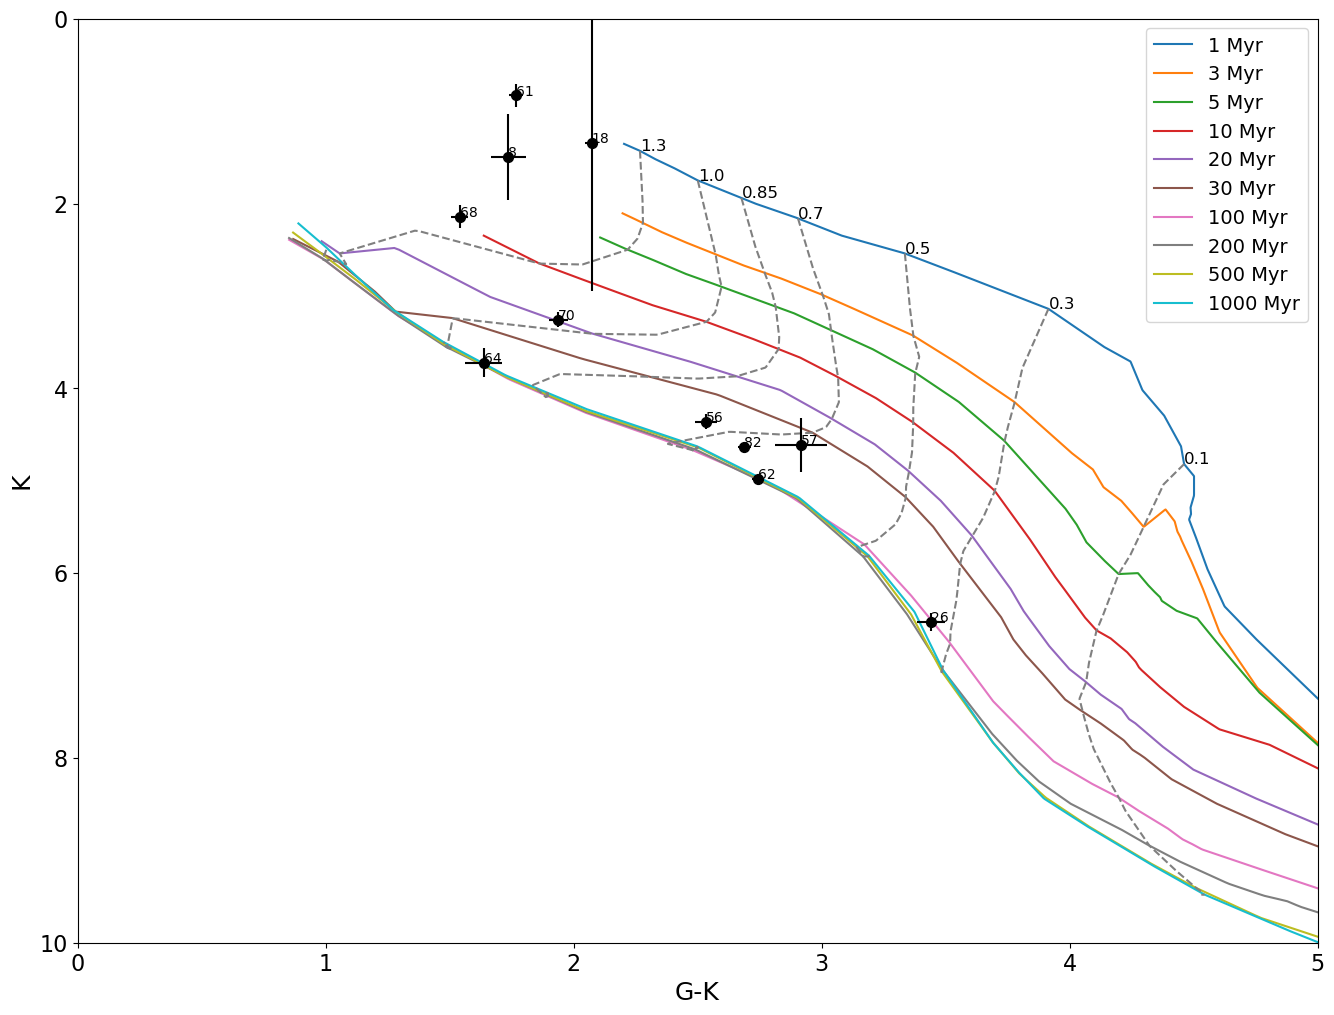

In [13]:
p1[0:100].CMD('G-K','K','bhac15')

But you don't have to necessarily start from a file to inizialize SampleObject in mode 1. A list of names can be provided too.

If id_type='DR3' ('DR2'), they must begin by 'Gaia DR3' ('Gaia DR2'):

In [14]:
star_list = ['Gaia DR3 537529798644191232','Gaia DR3 1087909890317863040', 'Gaia DR3 5836041389104329216', 'Gaia DR3 987536165308035328', 'Gaia DR3 4225093954826903680']
p2 = madys.SampleObject(star_list,id_type='DR3',ext_map=None)
p2.phot_table

ID,dr3_id,dr2_id,tmass_id,dr3_epoch,hipparcos_id,ra,dec,ra_error,dec_error,dr3_parallax,dr3_parallax_error,dr3_parallax_over_error,dr3_pmra,dr3_pmra_error,dr3_pmdec,dr3_pmdec_error,dr3_ra_dec_corr,dr3_ra_parallax_corr,dr3_ra_pmra_corr,dr3_ra_pmdec_corr,dr3_dec_parallax_corr,dr3_dec_pmra_corr,dr3_dec_pmdec_corr,dr3_parallax_pmra_corr,dr3_parallax_pmdec_corr,dr3_pmra_pmdec_corr,dr3_phot_g_mean_mag,dr3_phot_g_mean_flux,dr3_phot_g_mean_flux_error,dr3_phot_bp_mean_flux,dr3_phot_bp_mean_flux_error,dr3_phot_bp_mean_mag,dr3_phot_rp_mean_flux,dr3_phot_rp_mean_flux_error,dr3_phot_rp_mean_mag,dr3_bp_rp,dr3_phot_bp_rp_excess_factor,dr3_ruwe,dr3_astrometric_params_solved,dr3_rv,dr3_rv_error,dr2_epoch,dr2_ra,dr2_dec,dr2_ra_error,dr2_dec_error,dr2_parallax,dr2_parallax_error,dr2_parallax_over_error,dr2_pmra,dr2_pmra_error,dr2_pmdec,dr2_pmdec_error,dr2_ra_dec_corr,dr2_ra_parallax_corr,dr2_ra_pmra_corr,dr2_ra_pmdec_corr,dr2_dec_parallax_corr,dr2_dec_pmra_corr,dr2_dec_pmdec_corr,dr2_parallax_pmra_corr,dr2_parallax_pmdec_corr,dr2_pmra_pmdec_corr,dr2_phot_g_mean_mag,dr2_phot_g_mean_flux,dr2_phot_g_mean_flux_error,dr2_phot_bp_mean_flux,dr2_phot_bp_mean_flux_error,dr2_phot_bp_mean_mag,dr2_phot_rp_mean_flux,dr2_phot_rp_mean_flux_error,dr2_phot_rp_mean_mag,dr2_bp_rp,dr2_phot_bp_rp_excess_factor,dr2_ruwe,dr2_astrometric_params_solved,dr2_rv,dr2_rv_error,hipparcos_ra,hipparcos_dec,hipparcos_parallax,hipparcos_pmra,hipparcos_pmdec,hipparcos_ra_error,hipparcos_dec_error,hipparcos_parallax_error,hipparcos_pmra_error,hipparcos_pmdec_error,hipparcos_hp_mag,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ph_qual,tmass_ra,tmass_dec,gaia_hip_pmra,gaia_hip_pmra_error,gaia_hip_pmdec,gaia_hip_pmdec_error,dr3_gmag_corr,dr3_gflux_corr,dr3_phot_bp_rp_excess_factor_corr,dr3_phot_g_mean_mag_error,dr3_phot_bp_mean_mag_error,dr3_phot_rp_mean_mag_error,dr2_phot_bp_rp_excess_factor_corr,dr2_g_mag_error,dr2_bp_mag_error,dr2_rp_mag_error,ebv,ebv_err
,,,,yr,,deg,deg,mas,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,electron / s,electron / s,electron / s,electron / s,mag,electron / s,electron / s,mag,mag,,,,km / s,km / s,yr,deg,deg,mas,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,electron / s,electron / s,electron / s,electron / s,mag,electron / s,electron / s,mag,mag,,,,km / s,km / s,deg,deg,mas,mas / yr,mas / yr,deg,deg,mas,mas / yr,mas / yr,mag,mag,mag,mag,mag,mag,mag,,deg,deg,mas / yr,mas / yr,mas / yr,mas / yr,mag,electron / s,,mag,mag,mag,,mag,mag,mag,mag,mag
str28,object,object,object,float64,int32,float64,float64,float32,float32,float64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float64,float32,float32,float64,float32,float32,float32,float32,float32,int16,float32,float32,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float32,float32,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,object,float64,float64,float64,float64,float64,float64,float32,float64,float32,float64,float64,float64,float32,float64,float64,float64,float64,object
Gaia DR3 537529798644191232,Gaia DR3 537529798644191232,Gaia DR2 537529794344425984,00112647+7300292,2016.0,--,2.8604158023452304,73.00825074261374,1.325179,1.1207091,3.000000088729845,1.4241152,2.1065712,16.987371004711246,1.9610943,9.905987492581449,1.6226295,0.022035293,0.13738126,0.16689672,-0.06876506,0.04064269,-0.103836715,0.060810227,-0.15653208,0.12218038,0.12875833,20.246523,150.08521207936758,2.190623,48.44005240209921,6.6693745,21.12553,286.33650761762124,7.148981,18.605703,2.519827,2.2305765,4.152212,95,--,--,2015.5,2.860404321813468,73.00824800187223,1.73239331847859,1.174383138053

### Mode 2

Mode 2 does not perform a query in all-sky catalogs, since it takes all the information it needs from the user.

An astropy table must be given as input, with column names corresponding to valid filters. Photometric uncertainties for a filter *x* should be labeled *x_err*.

Here we collect information about two planets in the direct-imaged HR8799 system. For additional details on the numbers below, refer to the paper.

In [15]:
J, dJ, H, dH, K, dK = 5.383, 0.027, 5.280, 0.018, 5.240, 0.018 #2MASS magnitude and uncertainties for the primary star
par, par_err = 24.4620, 0.0455 #Gaia EDR3 parallax
age_old = [45,30,60] #[age optimal, age min, age max]

# creates a Table with all photometric data. Contrasts from Zurlo et al. (2016)
dic = {'object_name': ['HR 8799 b','HR 8799 c'],
       'SPH_J': [14.39+J, 13.21+J],
       'SPH_H2': [12.80+H, 11.81+H],
       'SPH_H3': [12.50+H, 11.50+H],
       'SPH_K1': [11.91+K, 10.95+K],
       'SPH_K2': [11.73+K, 10.62+K],
       'SPH_J_err': [np.sqrt(dJ**2+0.09**2),np.sqrt(dJ**2+0.13**2)],
       'SPH_H2_err': [np.sqrt(dH**2+0.14**2),np.sqrt(dH**2+0.12**2)],
       'SPH_H3_err': [np.sqrt(dH**2+0.10**2),np.sqrt(dH**2+0.10**2)],
       'SPH_K1_err': [np.sqrt(dK**2+0.06**2),np.sqrt(dK**2+0.05**2)],
       'SPH_K2_err': [np.sqrt(dK**2+0.09**2),np.sqrt(dK**2+0.07**2)],
       'parallax': [par, par],
       'parallax_err': [par_err, par_err]
      }
input_data = Table(dic)

hr8799_obj = madys.SampleObject(input_data,verbose=0,ext_map='leike')


In [16]:
print(hr8799_obj)

A SampleObject instance, mode 2 
Input data: Table({'object_name': np.array(['HR 8799 b', 'HR 8799 c'], dtype='<U9'), 'SPH_J': np.array([19.773, 18.593]), 'SPH_H2': np.array([18.08, 17.09]), 'SPH_H3': np.array([17.78, 16.78]), 'SPH_K1': np.array([17.15, 16.19]), 'SPH_K2': np.array([16.97, 15.86]), 'SPH_J_err': np.array([0.09396276, 0.13277424]), 'SPH_H2_err': np.array([0.1411524 , 0.12134249]), 'SPH_H3_err': np.array([0.10160709, 0.10160709]), 'SPH_K1_err': np.array([0.06264184, 0.05314132]), 'SPH_K2_err': np.array([0.09178235, 0.07227724]), 'parallax': np.array([24.462, 24.462]), 'parallax_err': np.array([0.0455, 0.0455])}) 
Settings: verbose=0, ext_map=leike


## Age-mass estimates

### Mode 1: a list of stars

An example of age and mass estimation: we analyze 73 young stars belonging to the Scorpius-Centaurus association.

In [17]:
els_file = r"C:\Users\vs454\OneDrive - University of Exeter\Desktop\Sci-Vi\PhD\My papers\MADYS\els.txt"
els_obj = madys.SampleObject(els_file,id_type='DR3',verbose=0,ext_map='leike')
result = els_obj.get_params('bhac15',age_range=[1,300],n_try=200,save_maps=True)

Execution ended. Elapsed time: 48 s.


For information about a specific keyword, please refer to the documentation inside madys.py.

To plot the chi2 map (as defined in the paper) for the sixth star, i.e. the one with index 5:

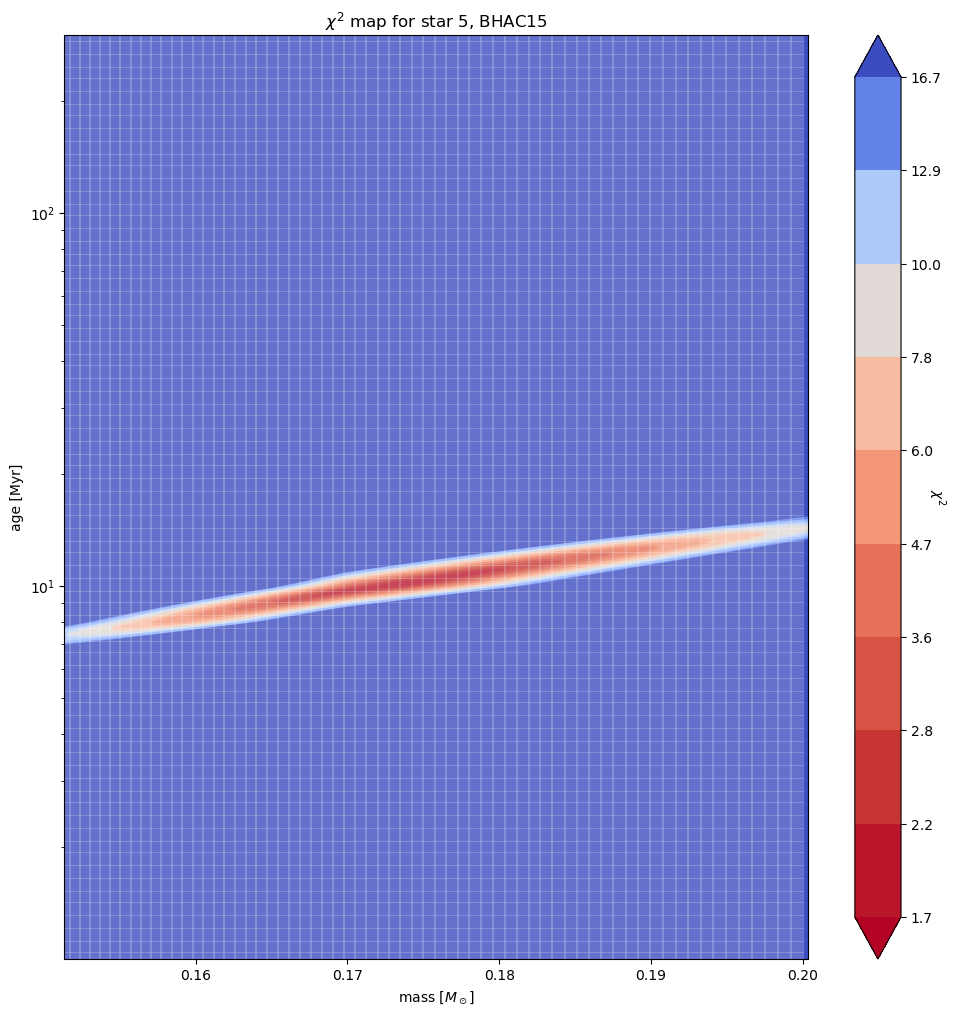

In [18]:
result.plot_maps(5, dtype='chi2')

### Mass estimate for HR 8799 b and c

Example of mode 2: a Table is provided as input at inizialization. Suitable for directly-imaged objects.

A thorough analysis of the system is provided in the paper.

In [19]:
res = hr8799_obj.get_params('ames-dusty',mass_range=[0.001,0.05],age_range=np.array([age_old,age_old]),m_unit='m_jup',ph_cut=0.8,n_try=5000)

Execution ended. Elapsed time: 6 s.


### Handling analysis results

Let us create an astropy table containing the results for the HR8799 case.

In [20]:
res_table = res.to_table()
res_table.round(3)
res_table

objects,age,age_min,age_max,mass,mass_min,mass_max,ebv,ebv_err,logL,logL_min,logL_max,radius,radius_min,radius_max,Teff,Teff_min,Teff_max,logg,logg_min,logg_max,fit_status
str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32
HR 8799 b,45.0,30.0,60.0,10.727,9.135,11.243,0.0,0.0,-4.451,-4.797,-4.198,1.263,1.222,1.323,1240.67,1035.462,1402.481,4.222,4.14,4.242,0
HR 8799 c,45.0,30.0,60.0,11.287,10.154,11.784,0.0,0.0,-4.32,-4.664,-4.099,1.288,1.226,1.343,1325.384,1114.689,1473.32,4.226,4.18,4.246,0


Or, alternatively, the results can be directly printed in an interactive mode (provided the module 'ipydatagrid' is installed on your PC):

In [21]:
res.pprint('in_notebook')

DataGrid(auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, corner_renderer=None, default_render…

'res', the object that stores the results of the analysis, is an instance of the FitParams class:

In [22]:
type(res)

madys.madys.FitParams

which is more of less a dictionary which additionally supports indexing and item assignment, just like a numpy array. The reference is, as usual, the original list of stars/substellar objects. In particular, indexing the object returns the object that would have been generated if the original list were indexed in the same way.

The len() of a FitParams object is equal to the number of stars in the original list.

Let us now consider again 'result', the FitParams instance related to the anaalysis of the file 'els.txt'.

In [23]:
result[[5,12]].pprint('in_notebook')

DataGrid(auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, corner_renderer=None, default_render…

Age/mass results are directly inspectable using the keywords 'ages' and 'masses', respectively. Here the first two rows of each array:

In [24]:
print('Ages: ',result['age'][0:2])
print('Ages_min: ',result['age_min'][0:2])
print('Ages_max: ',result['age_max'][0:2])
print('Masses: ',result['mass'][0:2])
print('Masses_min: ',result['mass_min'][0:2])
print('Masses_max: ',result['mass_max'][0:2])

Ages:  [12.46538389 13.0795533 ]
Ages_min:  [11.49205787 12.33552449]
Ages_max:  [13.52114629 13.86845891]
Masses:  [0.24700813 0.5536186 ]
Masses_min:  [0.23971169 0.54273536]
Masses_max:  [0.25452666 0.56472008]


Have a look at the documentation inside madys.py for a description of all the attributes of a FitParams object.

### Averaging results from different models

Sometimes it might be useful to use different models for the same objects to have an idea of inter-model uncertainties. It is also possible to average these results through a dedicated function of the FitParams class. The caveats of this operations are described in the documentation.

In [25]:
star_name2 = ['GJ660.1','HD73256']
star_obj2 = madys.SampleObject(star_name2,ext_map='leike',id_type='other')
star_res3 = star_obj2.get_params('parsec',age_range=[1,10000],n_try=100,save_maps=True, additional_columns = ['W1','W2'])
star_res4 = star_obj2.get_params('mist',age_range=[1,10000],feh=np.array([-0.9,0]),n_try=100,save_maps=True)

Execution ended. Elapsed time: 4 s.
Execution ended. Elapsed time: 4 s.


In [26]:
averaged_res = madys.FitParams.average_results([star_res3,star_res4], minimum_error = 0.1, cuts = {0: 'Teff < 2000', 1: 'Teff < 8000'})
averaged_res.pprint()

objects,age,age_min,age_max,mass,mass_min,mass_max,ebv,ebv_err,synth_W1,synth_W1_min,synth_W1_max,synth_W2,synth_W2_min,synth_W2_max,logL,logL_min,logL_max,radius,radius_min,radius_max,Teff,Teff_min,Teff_max,logg,logg_min,logg_max,fit_status
str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32
Gaia DR3 4364702279101280256,11.742703034501822,9.381413637057435,14.10399243194621,0.17691199640162578,0.1592207967614632,0.19460319604178836,0.006556196623978823,0.0,nan,nan,nan,nan,nan,nan,-1.5226993984524588,-1.370429458607213,-1.674969338297705,0.4396783719867323,0.38965169890820794,0.4897050450652567,3636.3312419009144,3272.698117710823,3999.964366091006,4.401482757713518,3.9613344819421665,4.8416310334848704,0
Gaia DR3 5643762781311698048,30.239559120801957,27.215603208721763,33.263515032882154,0.940016192628257,0.8460145733654313,1.0340178118910828,0.006400859395842878,0.0,nan,nan,nan,nan,nan,nan,-0.1407182328911931,-0.1266464096020738,-0.1547900561803124,0.972911481912472,0.8756203337212248,1.0702026301037193,5403.603788799997,4863.243409919998,5943.964167679997,4.436985010483262,3.993286509434936,4.880683511531589,0


## Extinction maps

### Extinction value for individual objects

The class SampleObject has a static method, interstellar_ext, which is able to estimate interstellar extinction in a certain band, given a list of equatorial or galactic coordinates. The method is automatically executed when inizializing a SampleObject instance.

Example of a manual use of the method: computing K-band extinctions for the 1000 stars from [this sample](#Mode-1:-a-list-of-stars).

If the selected map is not found in the extinction folder, it asks the permission to download it.

In [27]:
ra = np.array(p1.good_phot['ra'].filled(np.nan))
dec = np.array(p1.good_phot['dec'].filled(np.nan))
par = np.array(p1.good_phot['dr3_parallax'].filled(np.nan))
par_err = np.array(p1.good_phot['dr3_parallax_error'].filled(np.nan))

madys.SampleObject.interstellar_ext(ra=ra, dec=dec, par=par)

array([0.01252813,        nan, 0.01253057, 0.01251968,        nan,
              nan, 0.01222391, 0.01119699, 0.01051925, 0.01236868,
       0.01065364,        nan, 0.0110186 , 0.01072142,        nan,
       0.00891198, 0.01235418,        nan, 0.01218609,        nan,
              nan,        nan,        nan, 0.01226935, 0.01226412,
              nan, 0.01226011, 0.01223018, 0.01221352, 0.01209614,
       0.01163105,        nan, 0.01247297,        nan,        nan,
              nan, 0.01218656, 0.01139538, 0.01215851, 0.01217027,
       0.01219221,        nan, 0.01214491,        nan, 0.01227619,
              nan,        nan, 0.01213154,        nan,        nan,
       0.01179123, 0.01185368, 0.01253768,        nan, 0.01177085,
       0.01174152, 0.01174271, 0.01174089, 0.01173113,        nan,
              nan, 0.01210387, 0.01165133, 0.01165183, 0.01167069,
       0.01055381, 0.01166817, 0.01170956, 0.01215621,        nan,
       0.011686  ,        nan, 0.01130294, 0.01181691,        

### Extinction map for a region

Let's reproduce the left panel of Fig. 1 from the paper. Relevant keywords:

- ra (l): a two-element list with minimum and maximum right ascension (galactic longitude) to be plotted on the x axis;
- dec (b): a two-element list with minimum and maximum declination (galactic latitude) to be plotted on the y axis;
- par (d): float or int. Parallax (distance) corresponding to the depth of the integration [mas] ([pc]);
- color: any valid filter (e.g., 'G') or color (e.g., 'G-K') present in MADYS. See SampleObject.info_filters(color) to see if the filter exists.

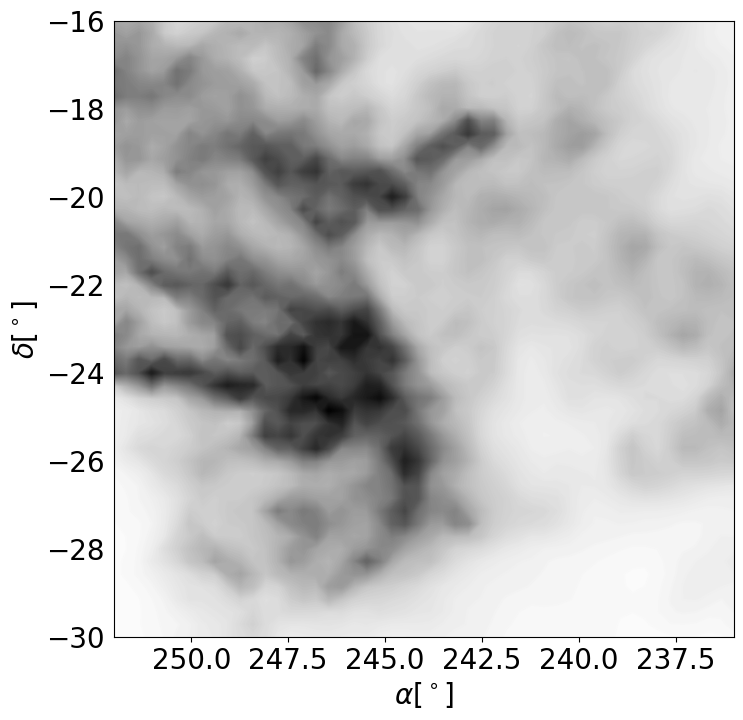

In [28]:
grid_x = np.linspace(236,252,1000)
grid_y = np.linspace(-30,-16,1000)
XX, YY = np.meshgrid(grid_x,grid_y)

fontsize=20

fig, ax = plt.subplots(figsize=(8,8))
madys.SampleObject.plot_2D_ext(ra=[236,252],dec=[-30,-16],d=160,color='G',reverse_xaxis=True,cmap='gray_r',fontsize=fontsize,colorbar=False,ax=ax)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(which='minor', bottom=False)
ax.yaxis.set_tick_params(which='major', bottom=False)
ax.set_xlabel(r'$\alpha [^\circ]$',fontsize=fontsize)
plt.show()

## Contrast curves

### CurveObject class

A class introduced in MADYS 1.1.0. It is meant to convert contrast curves (=detection limit curves) into mass limit curves employing the principles underlying MADYS.

For further information, refer to the documentation.

The class is now superseded by DetectionMap, and will be removed in the future.

Here a small example of its usage.

In [29]:
file2 = r"C:\Users\vs454\Downloads\contrast_maps\SPHERE_contrast_curve.fits"
params2 = {'parallax': 5.8219, 'parallax_error':0.31,
          'ebv': 0.04, 'ebv_error': 0.01,
          'app_mag': 6.182, 'app_mag_error': 0.233,
          'band': 'SPH_K1', 'age': 16.,
          'age_error': 7.
         }

prova2 = madys.CurveObject(file2, 'contrast_map', params2, rescale_flux = 1/np.sqrt(2))
results1 = prova2.compute_mass_limits('ames-dusty')
results2 = prova2.compute_mass_limits('ames-cond')
results3 = prova2.compute_mass_limits('atmo2020-ceq')

Execution ended. Elapsed time: 1 s.
Execution ended. Elapsed time: 2 s.
Execution ended. Elapsed time: 2 s.


### DetectionMap

Introduced in MADYS 2.0.0, it supersedes CurveObject. Similarly to CurveObject, it can turn a contrast curve (=detection limit curve) into a mass limit curve; in addition to this, it can compute the completeness map (=detection probability map) for that observation.

For further information, refer to the documentation.

Here some examples of its usage.

Accepted inputs:

- if file_type == 'contrast_separation':

    1) a 2D numpy array, with size (n_points, 2), where the first column stores contrasts, the second one separations in arcsec;
    2) a tuple (contrasts, separations), with the two items being numpy arrays as in 1);
    3) a valid .fits file containing the data, formatted as in 1).

- if file_type == 'contrast_map':
    1) a 2D numpy array, with size (n_x, n_y), representing the contrasts achieved for any pixel in the original image;
    2) a valid .fits file containing the data, formatted as in 1).




#### Example 1

In this example, the input is a .fits file containing a 2D contrast map.

In [30]:
file = r"C:\Users\vs454\Downloads\try_gpi_curve.fits"

file_type = 'contrast_map'
params = {'parallax': 6.513805293,
          'parallax_error': 0.015934942,
          'app_mag': 7.969, 'app_mag_error': 0.044,
          'band': 'SPH_H', 'age': 10.,
          'age_min': 7., 'age_max': 13.,
          'ebv': 0.267058016, 'ebv_error': 0.267058016 
         }
exodmc_params = {'x_min': 0.1, 'x_max': 10000,
                 'y_min': 0.1, 'y_max': 100,
                 'nx': 500, 'ny': 200,
                 'logx': True, 'logy': True                 
                }

x = madys.DetectionMap(file, file_type, params, exodmc_parameters=exodmc_params)

The function below computes 1D mass curves (and 2D, if a 2D input file was provided).

In [31]:
mass_limits = x.compute_mass_limits('atmo2023-ceq')

Execution ended. Elapsed time: 4 s.


We can access the contrast curve in this way:

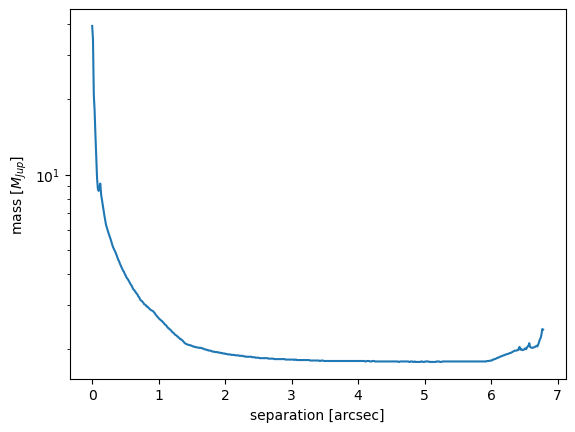

In [33]:
mass_array = mass_limits['map_1D'][0, :, 0]
separation_array = mass_limits['map_1D'][0, :, 1]

plt.plot(separation_array, mass_array)
plt.yscale('log')
plt.xlabel('separation [arcsec]')
plt.ylabel(r'mass [$M_{Jup}$]')
plt.show()

The first axis of mass_limits['map_1D'] represents the age triplet [age_opt, age_min, age_max]; the second axis represent the length of the two arrays; the third axis has two indices, one for the separation and one for the mass curve.

The associated detection probability map can be created in this way:

my star time elapsed - 00:00:03.78


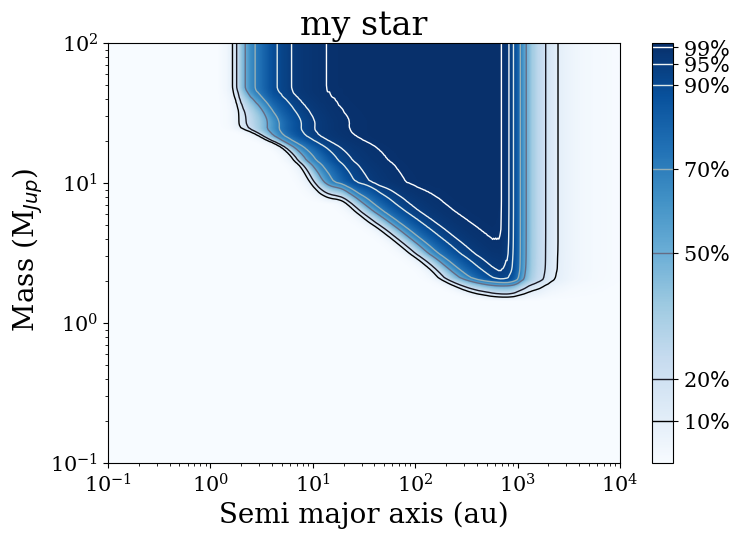

In [34]:
dpm = x.DImode_from_contrasts('atmo2023-ceq', plot=True)

Please refer to the documentation for further information on the available options.

#### Grid coverage

Does the model cover the entirety of the magnitude range probed by the contrast curve and the age span of our interest? This can be checked using this function:

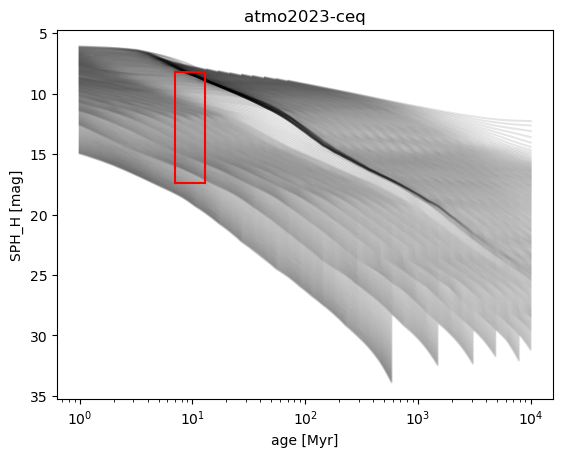

In [35]:
x.visualize_grid_coverage('SPH_H', 'atmo2023-ceq')

Each line here corresponds to a different mass track.

#### Example 2

A tuple of arrays can be provided too. In this case, the name of the star must be provided. The platescale of the instrument,, specified by the keyword 'PIXTOARC', is needed if the input is 2D.

In [36]:
params = {'parallax': 6.513805293,
          'parallax_error': 0.015934942,
          'app_mag': 7.969, 'app_mag_error': 0.044,
          'band': 'SPH_H', 'age': 10.,
          'age_min': 7., 'age_max': 13.,
          'ebv': 0.267058016, 'ebv_error': 0.267058016 
         }
exodmc_params = {'x_min': 0.1, 'x_max': 10000,
                 'y_min': 0.1, 'y_max': 100,
                 'nx': 500, 'ny': 200,
                 'logx': True, 'logy': True                 
                }
seq_params = {'OBJECT': 'My star', 'PIXTOARC': 12.3}

separation_array = np.arange(0.1, 10, 0.1)
contrast_array = 5e-7 / separation_array

input_data = (contrast_array, separation_array)
another_instance = madys.DetectionMap(input_data, 'contrast_separation', params, 
                                      exodmc_parameters=exodmc_params, 
                                      sequence_parameters=seq_params)

In this case, the model does not fully cover the magnitude range probed by the contrast curve:

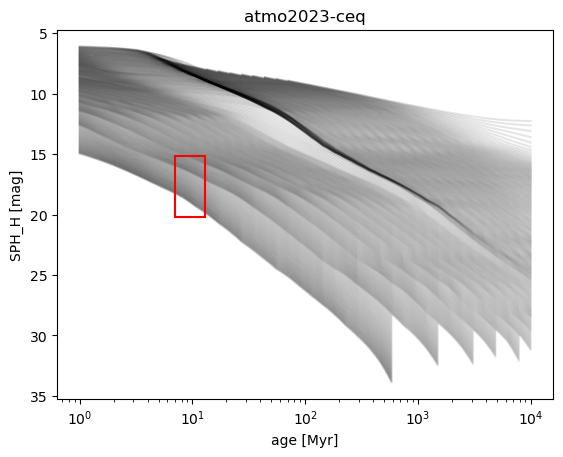

In [37]:
another_instance.visualize_grid_coverage('SPH_H', 'atmo2023-ceq')

Let's see what happens in the DPM:

My star time elapsed - 00:00:03.84


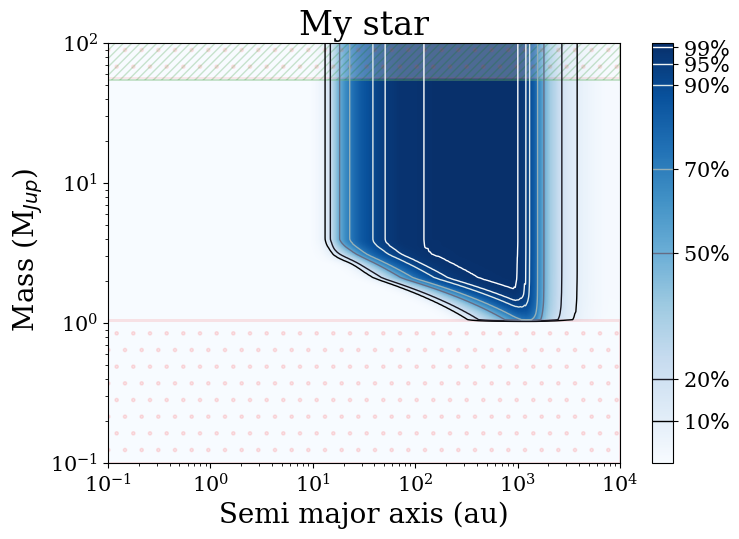

In [38]:
dpm1 = another_instance.DImode_from_contrasts('atmo2023-ceq', plot=True, show_model_limits=True)

The DPM appears to be cropped at about ~1 $M_J$. Indeed, the model is not defined in the red-dotted area in the figure above. In cases like this, one might consider turning on extrapolation:

My star time elapsed - 00:00:04.75


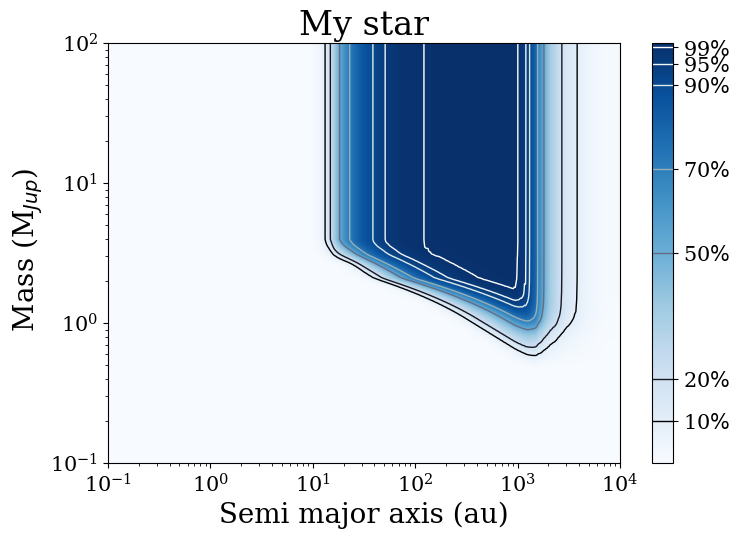

In [39]:
dpm1 = another_instance.DImode_from_contrasts('atmo2023-ceq', plot=True, extrapolate=True)

#### Exporting to .fits file

In [40]:
output_file = r"C:\Users\vs454\Downloads\try_export_dpm.fits"
another_instance.save_dpm(dpm1, 'atmo2023-ceq', output_file)

## Utils

### Visualizing the variation of a quantity across the isochrone grid

IsochroneGrid is the class that builds and handles the final isochronal grid used for parameter determination.

Here a direct way to inspect both the dynamical range of a model grid, and the magnitudes corresponding to suitable mass and age ranges:

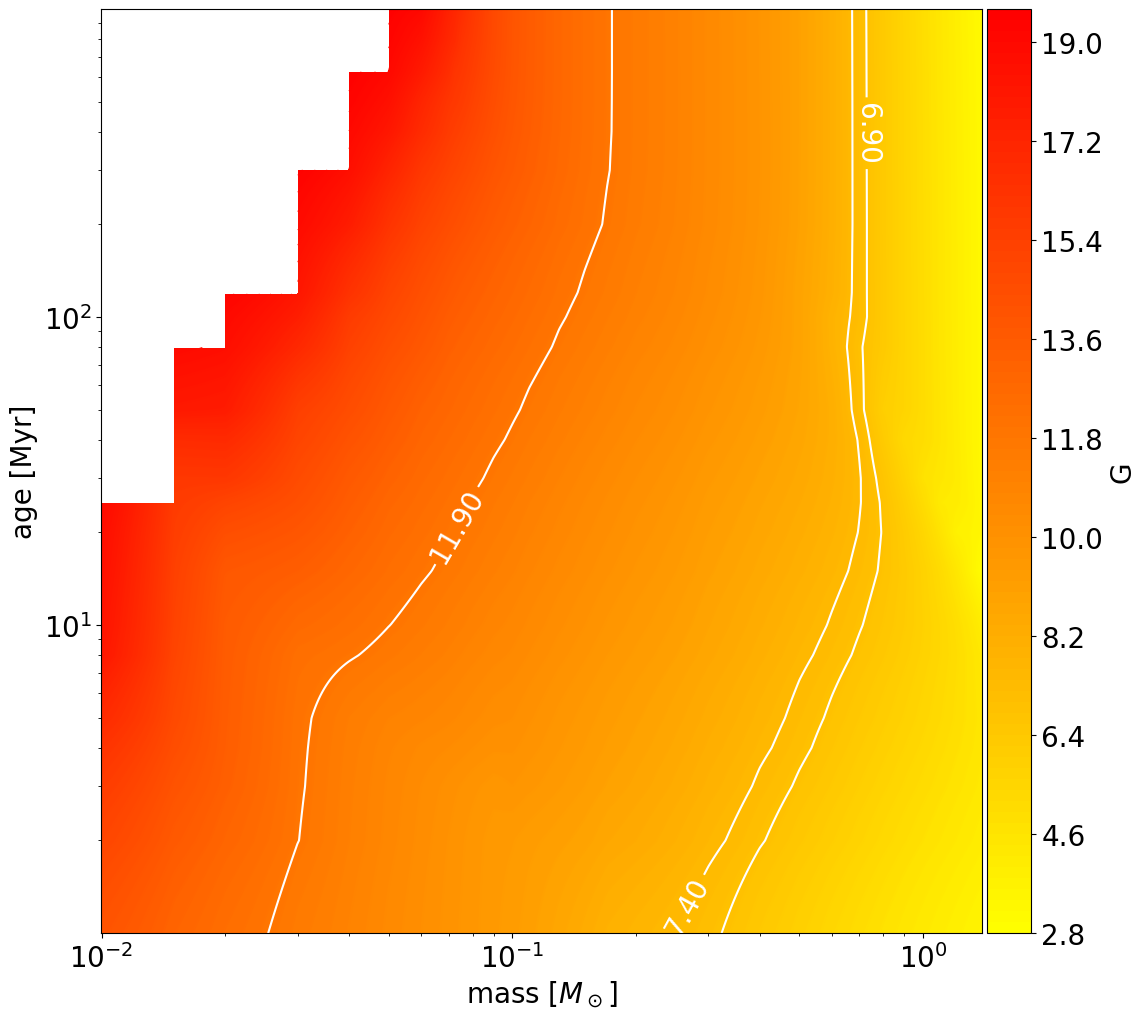

In [41]:
madys.IsochroneGrid.plot_iso_grid('G','bhac15',x_log=True,y_log=True,levels=[6.9,7.4,11.9],fontsize=20,cmap='autumn_r')

### Save FitParams results to .txt file

To export to a file the results stored in a FitParams instance, use the to_file method:

In [42]:
star_name2 = ['GJ660.1','HD73256']
star_obj2 = madys.SampleObject(star_name2, ext_map='leike', id_type='other', verbose = 0)
star_res = star_obj2.get_params('parsec',age_range=[1,10000],n_try=100,save_maps=True, additional_columns = ['W1','W2'])

star_res.to_file(r'C:\Users\vs454\Downloads\aa3.txt')   

Execution ended. Elapsed time: 3 s.


Typing a file that ends with .csv will create a comma-separated .csv file. Any other format will create a fixed-width ascii file.

### Create logs

Let's now enable the creation of a log file by setting a verbose value of 2 or 3 during inizialization of the SampleObject instance.

We must not forget to specify a 'mock_file' argument if the first input is not a file path.

In [43]:
star_name2 = ['GJ660.1','HD73256']
star_obj2 = madys.SampleObject(star_name2,ext_map='leike',id_type='other', verbose = 2, mock_file = r'C:\Users\vs454\Downloads\try_log_creation.txt')

star_res = star_obj2.get_params('parsec',age_range=[1,10000],n_try=100,save_maps=True, additional_columns = ['W1','W2'])

Total time needed to retrieve photometry for 2 targets: - 00:00:01.42.
Time for the computation of extinctions: 0.64 s.
Execution ended. Elapsed time: 3 s.


### Read/write SampleObject instances as .h5 files

To store SQL results locally, a SampleObject instance can be exported to/imported from a .h5 file.

Let's try to export an instance to a file:

In [44]:
obj_3stars = madys.SampleObject(['HD 75898','HD 11506', 'HD 72659'], id_type='other', ext_map='leike')
output_file = r"C:\Users\vs454\Downloads\try_sampleobject.h5"
obj_3stars.export_to_file(output_file)

Let's now try to import the files from the same file:

In [45]:
new_obj_3stars = madys.SampleObject.import_from_file(output_file, verbose=0)

Are the two instances really the same? We can check for equality:

In [46]:
obj_3stars == new_obj_3stars

True

### Read/write FitParams instances as .h5 files

The same import/export operation can be performed upon a FitParams instance to avoid repeating a computation.

In [47]:
obj_3stars = madys.SampleObject(['HD 75898','HD 11506', 'HD 72659'], id_type='other',
                                ext_map='leike', verbose=0)
feh = np.array([0.1,0.2,0.0])
res_3stars = obj_3stars.get_params('parsec', n_try=1000, 
                                   feh=feh, save_maps=True,
                                   age_range=[10,10000], additional_columns=['W1'])

output_file = r"C:\Users\vs454\Downloads\try_fit_params.h5"

res_3stars.export_to_file(output_file)
res2_3stars = madys.FitParams.import_from_file(output_file)

Execution ended. Elapsed time: 14 s.


Check for equality:

In [48]:
res_3stars == res2_3stars

True